# Home Assignment No. 2 - part two

To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* You have to write **CODE** directly inside specified places marked by comments: **BEGIN/END Solution**. Do not create new cells.

* In some problems you are asked to provide a short discussion of the results. For that find the specific place marked via **Your text answer: \<write your answer\>**.

* For every separate problem or subproblem (if specified) you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task.

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e., if the reviewer decides to restart the notebook and run all cells, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest fixing random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include necessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.


In [1]:
# Your imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import GPy
from sklearn.metrics import r2_score, accuracy_score
from sklearn.cluster import Birch, AgglomerativeClustering
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.linear_model import LogisticRegression

from scipy import stats
from tqdm import tqdm
from itertools import product
import warnings
warnings.filterwarnings('ignore')

## Task 1 - Gaussian Processes (1 pt.)

In the following exercise, you will need to fit the gaussian process with different kernels on the ```elecricity_consumption_FR.csv``` time series data. We have already loaded and prepared the train/test datasets for you below.

Use [**GPy**](https://pypi.python.org/pypi/GPy) library for training and prediction. Fit a GP and run the predict on the test. Useful kernels to combine: `GPy.kern.RBF, GPy.kern.Poly, GPy.kern.StdPeriodic, GPy.kern.White, GPy.kern.Linear`. 

**The task**:
* Normalize the target value by fitting a transformation on the train (use ```sklearn.preprocessing.StandardScaler```)
* Plot the resulting target against the time index.
* Plot mean and confidence interval of the prediction. 
* Inspect them on normality by scatter plot: plot predicted points/time series against true values. 
* Estimate the prediction error with `r2_score`. R2-score accepted > 0.7 on test sample.

In [2]:
! pip3 install GPy

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('elecricity_consumption_FR.csv')

In [21]:
data.dropna(inplace=True)

In [22]:
y = np.array(data.values)
X = np.array(data.index)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.3)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)


Normalize the target value by fitting a transformation on the train (use sklearn.preprocessing.StandardScaler)

In [24]:
### BEGIN SOLUTION (do not delete this comment!)
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)
### END SOLUTION (do not delete this comment!)

Plot the resulting target against the time index.

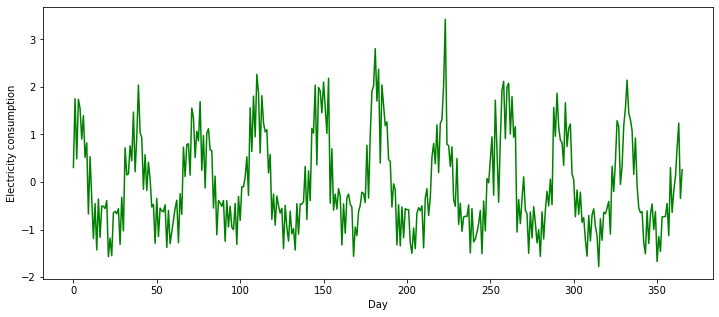

In [25]:
### BEGIN SOLUTION (do not delete this comment!)
  
plt.figure(figsize=(12, 5))
plt.plot(np.append(X_train, X_test), np.append(y_train, y_test), c='green')
plt.ylabel('Electricity consumption')
plt.xlabel('Day')
plt.show()

### END SOLUTION (do not delete this comment!)

Plot mean and confidence interval of the prediction.

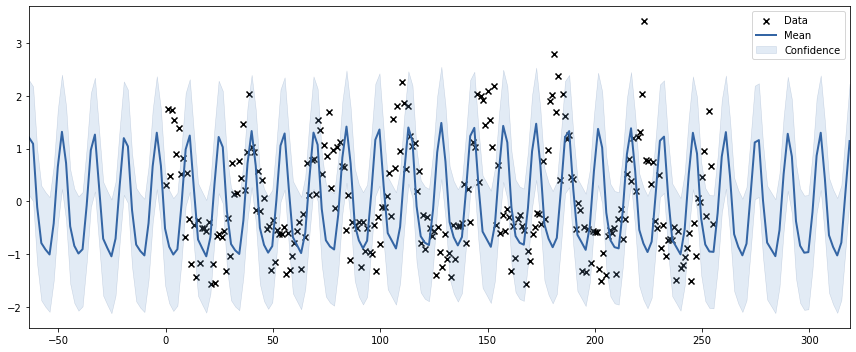

In [26]:
### BEGIN SOLUTION (do not delete this comment!)
kernel = GPy.kern.RBF(1, variance = 10) + GPy.kern.StdPeriodic(1, 0.1)
m = GPy.models.GPRegression(X_train, y_train, kernel)
m.optimize()
m.plot(figsize=(12,5));
### END SOLUTION (do not delete this comment!))

Inspect them on normality by scatter plot: plot predicted points/time series against true values.

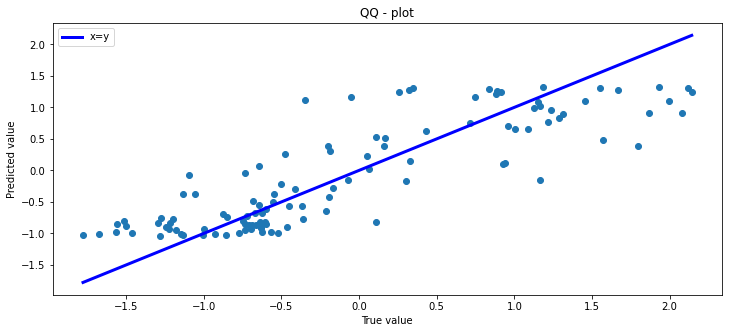

In [42]:
### BEGIN SOLUTION (do not delete this comment!)

plt.figure(figsize=(12, 5))
pred = m.predict(X_test)[0]
plt.scatter(y_test, pred)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], label='x=y', linewidth=3, color='blue')
plt.title('QQ - plot')
plt.ylabel('Predicted value')
plt.xlabel('True value')
plt.legend()
plt.show()

### END SOLUTION (do not delete this comment!)

Estimate the prediction error with r2_score. R2-score accepted > 0.7 on test sample.

In [45]:
### BEGIN SOLUTION (do not delete this comment!)
print(f"R2-score: {r2_score(y_test, pred)}") 
### END SOLUTION (do not delete this comment!)

R2-score: 0.7218760070447401


## Task 2 - MNIST, kMNIST component analysis and manifold learning. (5 pts.)

### Task 2.1. (1 pt)

Download `MNIST` dataset. Here we will estimate the data intrinsic dimensionality, decompose the dataset on principle components and estimate the cumulative explained variance by each component.

You can either use the [proposed method](https://www.stat.berkeley.edu/~bickel/mldim.pdf) for the estimation of sample intrinsic dimension or any other method (convenient for you). For the first case, yoyu may use the code from [here](https://gist.github.com/mehdidc/8a0bb21a31c43b0cbbdd31d75929b5e4)

1. Estimate the intrinsic dimensionality of the dataset. Provide the plot.
2. Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with **6** different set of components and corresponding explained variance. You can choose any digit from the dataset.

In [5]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

dg = datasets.load_digits()

scaler = StandardScaler().fit(dg.data)
data = scaler.transform(dg.data)

1) Estimate the intrinsic dimentionality of the dataset. Provide the plot.

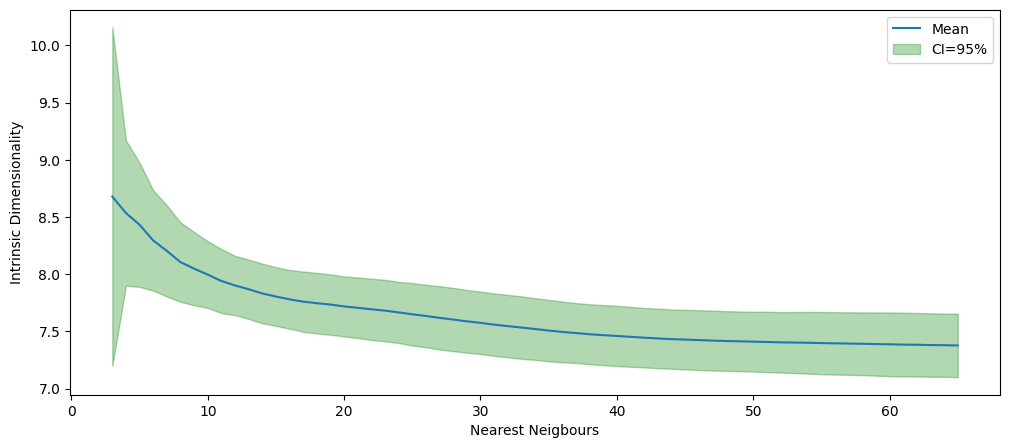

In [4]:
### BEGIN SOLUTION (do not delete this comment!)
from tqdm import tqdm
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

def intrinsic_dim_sample_wise(X, k=5):
    neighb = NearestNeighbors(n_neighbors=k + 1).fit(X)
    dist, ind = neighb.kneighbors(X)
    dist = dist[:, 1:]
    dist = dist[:, 0:k]
    assert dist.shape == (X.shape[0], k)
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1])
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample

def intrinsic_dim_scale_interval(X, k1=10, k2=20):
    X = pd.DataFrame(X).drop_duplicates().values # remove duplicates in case you use bootstrapping
    intdim_k = []
    for k in range(k1, k2 + 1):
        m = intrinsic_dim_sample_wise(X, k).mean()
        intdim_k.append(m)
    return intdim_k

def repeated(func, X, nb_iter=100, random_state=None, verbose=0, mode='bootstrap', **func_kw):
    if random_state is None:
        rng = np.random
    else:
        rng = np.random.RandomState(random_state)
    nb_examples = X.shape[0]
    results = []

    iters = range(nb_iter)
    if verbose > 0:
        iters = tqdm(iters)    
    for i in iters:
        if mode == 'bootstrap':
            Xr = X[rng.randint(0, nb_examples, size=nb_examples)]
        elif mode == 'shuffle':
            ind = np.arange(nb_examples)
            rng.shuffle(ind)
            Xr = X[ind]
        elif mode == 'same':
            Xr = X
        else:
            raise ValueError('unknown mode : {}'.format(mode))
        results.append(func(Xr, **func_kw))
    return results

k1 = 3 # start of interval(included)
k2 = 65 # end of interval(included)
experiment = repeated(intrinsic_dim_scale_interval, 
                             data, 
                             mode='bootstrap', 
                             nb_iter=100, # nb_iter for bootstrapping
                             verbose=0, 
                             k1=k1, k2=k2)
experiment = np.array(experiment)
m = np.mean(experiment, axis=0)
std = np.std(experiment, axis=0)

plt.figure(figsize=(12,5))
plt.plot(np.arange(3, 66, 1), m, label='Mean')
plt.fill_between(np.arange(3, 66, 1), m - 1.96 * std, m + 1.96 * std, 
                 color='g', alpha=0.3, label='CI=95%')
plt.ylabel('Intrinsic Dimensionality')
plt.xlabel('Nearest Neigbours')
plt.legend()
plt.show()
### END SOLUTION (do not delete this comment!)

2) Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with 6 different set of components and corresponding explained variance. You can choose any digit from the dataset.

In [6]:
### BEGIN SOLUTION (do not delete this comment!)
from sklearn.decomposition import PCA

pca = PCA()
tmp = pca.fit_transform(data)
expvar = pca.explained_variance_ratio_
cum_sum = np.cumsum(expvar)

plt.figure(figsize=(10, 5))
plt.step(range(0,len(cum_sum)), cum_sum, where='mid',label='Cumulative explained variance')
plt.plot(range(0,len(cum_sum)), [0.95 for _ in range(0,len(cum_sum))], 
         linestyle='--', c='r', label='95% explained variance')
plt.title('Cumulative explained variance', fontsize=15)
plt.ylabel('Cumulative explained variance', fontsize=13)
plt.xlabel('# principle components', fontsize=13)
plt.legend(loc='best')
plt.tight_layout()
plt.show()
### END SOLUTION (do not delete this comment!)

In [12]:
### BEGIN SOLUTION (do not delete this comment!)
index = 256
fig, axes = plt.subplots(1, 6, figsize=(20, 10))

for i, num in enumerate([63, 50, 40, 20, 10, 5]):
    pca = PCA(n_components=num)
    latent = pca.fit_transform(data)
    reconstructed = pca.inverse_transform(latent[index])
    percent = int(100 * cum_sum[num])
    if percent == 100:
        title = 'Original image'
    else:
        title = '{}% of Explained Image'.format(percent)

    axes[i].imshow(scaler.inverse_transform(reconstructed.reshape(1, -1)).reshape(8, 8), cmap='gray')
    axes[i].set_title(title)
    if title != 'Original image':
        axes[i].set_xlabel("{} components".format(num))
### END SOLUTION (do not delete this comment!)


### Task 2.2. (1 pt.)

Here we will visualize the decomposition in order to observe how data diverges across different manifold learning methods. We are to compare `PCA`, `ICA` and `Isomap` non-linear decompositions [see more over here https://scikit-learn.org/stable/modules/manifold.html], and check the classification accuracy on the new features. 

1. Calculate new features on the data with ICA, PCA and Isomap. **Choose the number of components according to your estimation of intrinsic dimension**. Calculate the classification accuracy on these features with `LogisticRegression` on `cross_val=5` with $3$ repeats. Use `RepeatedKFold` and fit the `random_seed = 42`.
2. Show that the `Isomap` gives a statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. Justify your results, write down 2-3 sentences.


In [11]:
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import Isomap

1) Calculate new features on the data with ICA, PCA and Isomap. Choose the number of components according to your estimation of intrinsic dimention. Calculate the classification accuracy on these features with LogisticRegression on cross_val=5 with  3  repeats. Use RepeatedKFold and fit the random_seed = 42.

In [13]:
### BEGIN SOLUTION (do not delete this comment!)
pca = PCA(n_components=8, random_state=42) #number of components used - 8, according to graph of intrinsic dimension above
ica = FastICA(n_components=8, random_state=42, max_iter=1000)
isomap = Isomap(n_components=8, max_iter=1000, n_jobs=-1)

data_pca = pca.fit_transform(data)
data_ica = ica.fit_transform(data)
data_iso = isomap.fit_transform(data)

rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
logreg = LogisticRegression(random_state=42, max_iter=3000)

y = dg.target
pca_acc = []
ica_acc = []
isomap_acc = []

for train_index, test_index in rkf.split(data):
    logreg.fit(data_pca[train_index], y[train_index])
    pca_acc.append(logreg.score(data_pca[test_index], y[test_index]))

for train_index, test_index in rkf.split(data):
    logreg.fit(data_ica[train_index], y[train_index])
    ica_acc.append(logreg.score(data_ica[test_index], y[test_index]))

for train_index, test_index in rkf.split(data):
    logreg.fit(data_iso[train_index], y[train_index])
    isomap_acc.append(logreg.score(data_iso[test_index], y[test_index]))

print('PCA:', np.mean(pca_acc))
print('FastICA:', np.mean(ica_acc))
print('Isomap:', np.mean(isomap_acc))
### END SOLUTION (do not delete this comment!)


PCA: 0.8733080573609822
FastICA: 0.7150943980191891
Isomap: 0.9545460641700195


2) Show that the `Isomap` gives statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. 

In [48]:
### BEGIN SOLUTION (do not delete this comment!)
s1, p1 = stats.ttest_rel(a=pca_acc, b=isomap_acc, alternative='less')
s2, p2 = stats.ttest_rel(a=ica_acc, b=isomap_acc, alternative='less')
print('T test with alternative hypothesis that Isomap has greater accuracy than PCA')
print('Statistic: {:.3f} p_value: {}'.format(-s1, p1))
print('T test with alternative hypothesis that Isomap has greater accuracy than FastICA')
print('Statistic: {:.3f} p_value: {}'.format(-s2, p2))
### END SOLUTION (do not delete this comment!)

T test with alternative hypothesis that Isomap has greater accuracy than PCA
Statistic: 15.767 p_value: 1.312740519372227e-10
T test with alternative hypothesis that Isomap has greater accuracy than FastICA
Statistic: 22.822 p_value: 8.921402895555597e-13


### Task 2.3. (1 pt.)

3) Justify your results, write down 2-3 senteces.

*BEGIN SOLUTION (do not delete this comment!)*

We have hypothesis, that Isomap performes better, than PCA and FastICA.
As we can see from results, p_value is very small, so from statistics we can not reject null hypothesis, therefore we agree that Isomap better than PCA and FastICA. 

*END SOLUTION (do not delete this comment!)*

### Task 2.4. kMNIST dimensionality reduction. (2 pts.)

Explore `KMNIST` dataset https://github.com/rois-codh/kmnist. You are to engineer new features (by using any familiar to you method of Manifold Learning) to increase the classification accuracy. Use the `KNN` classifier with any hyperparameters you like.

1. __(2 pt.)__ Get accuracy on `test_set` more than 93%`. 

**NOTE** that the data is rather heavy, thus your decomposition will take a while.

__Hint:__ Try to use dimensionality reduction methods, which yield better model performance on `MNIST`. These methods can compete with Autoencoders on `torch`. 

1) Get accuracy on test_set more than 93%.

In [86]:
import numpy as np

In [87]:
from sklearn.neighbors import KNeighborsClassifier

def load(f):
    return np.load(f)['arr_0']

# Load the data
x_train = load('kmnist-train-imgs.npz')
x_test = load('kmnist-test-imgs.npz')
y_train = load('kmnist-train-labels.npz')
y_test = load('kmnist-test-labels.npz')

# Reshape the data
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [96]:
### BEGIN SOLUTION (do not delete this comment!)
pca = PCA(n_components=50)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

clf = KNeighborsClassifier(n_jobs=-1)
clf.fit(x_train, y_train)

print('Test accuracy:',clf.score(x_test, y_test))
### END SOLUTION (do not delete this comment!)

Test accuracy: 0.9327


## Task 3 - Clustering (2 pts.)

### Task 3.1. Explore KMeans and Gaussian Mixture algorithms (1 pt.)

Try **KMeans, Gaussian Mixture** and **two** more clustering algorithms from sklearn. 
To evaluate clustering performance use **two** clustering metrics: *silhouette score*
and *mutual information* or *adjusted mutual information*.

For each algorithm **your task** is to try to find the parameters leading to the best performance for `n_clusters=true_number_of_clusters`:
1. Apply the algorithm with the true number of clusters and try out at least two **other variants** of the number of clusters: a smaller and a larger one than the true number.;
2. For each number of clusters **visualize the clustering result**, calculate the **clustering metrics** and plot them;

__NOTE:__ `sklearn.model_selection.GridSearchCV` does not support clustering methods, thus you suppose to do it manually.

In [2]:
import numpy as np

True number of clusters is 15


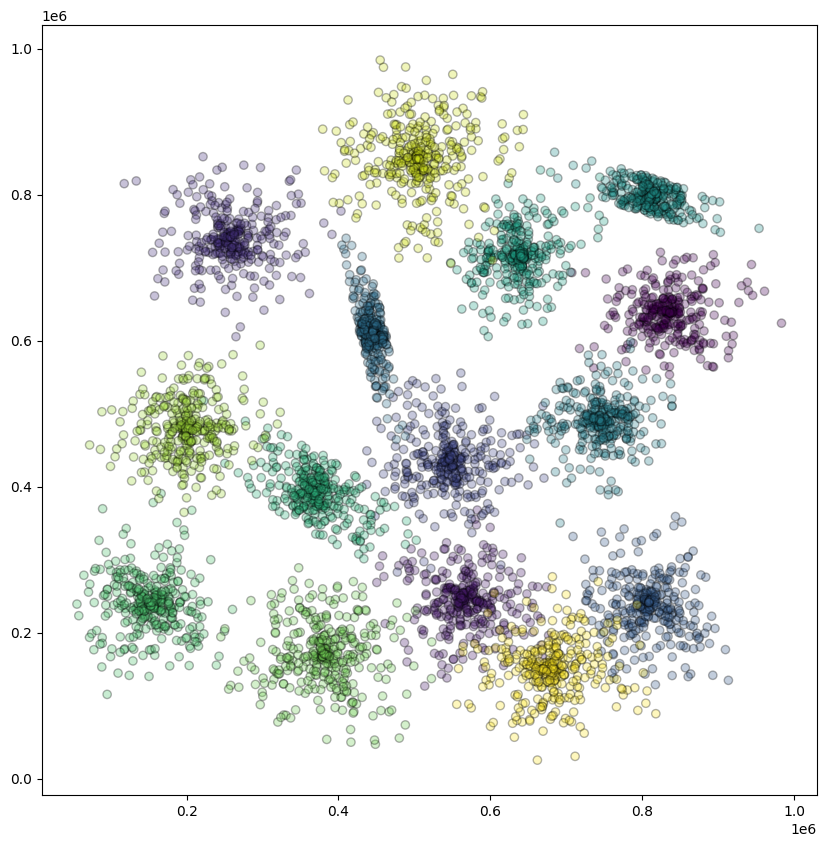

In [5]:
points, labels = np.loadtxt('clustering.txt'), np.loadtxt('clustering_labels.txt')
labels = labels.astype(int)
print("True number of clusters is {}".format(np.max(labels)))
plt.figure(figsize=(10, 10))
plt.scatter(points[:,0], points[:,1], c=labels, alpha=0.3, edgecolor='k')

plt.show()

In [6]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, mutual_info_score
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler

1) For each algorithm your task is to try to find the parameters leading to the best performance for n_clusters=true_number_of_clusters

In [7]:
### BEGIN SOLUTION (do not delete this comment!)
number_of_clasters = 15
kmeans_params = {'n_clusters': [number_of_clasters], 'n_init': [5, 10, 15, 20], 
                 'algorithm': ['lloyd', 'elkan'], 'random_state': [0xC0FFEE]}
gausmix_params = {'n_components': [number_of_clasters], 'covariance_type': ['full', 'tied', 'diag', 'spherical'], 
                  'reg_covar': [1e-4, 1e-5, 1e-6], 'n_init': [1, 3, 5],
                  'init_params': ['kmeans', 'k-means++', 'random', 'random_from_data'], 'random_state': [0xC0FFEE]}
birch_params = {'n_clusters': [number_of_clasters], 'threshold': [0.3, 0.4, 0.5, 0.6], 
                'branching_factor': [30, 40, 50, 60, 70]}
agglomer_params = {'n_clusters': [number_of_clasters], 'affinity': ['euclidean', 'l1', 'l2', 'manhattan', 'cosine'], 
                   'linkage': ['ward', 'complete', 'average', 'single']}
                  
algos = [(KMeans, kmeans_params), (GaussianMixture, gausmix_params), 
         (Birch, birch_params), (AgglomerativeClustering, agglomer_params)]
best_algos_params = []

for algo, algo_params in tqdm(algos):
    best_params = {}
    best_scores = [0, 0]
    for values in product(*algo_params.values()):
        if 'ward' in values:
            if not 'euclidean' in values:
                continue
        params = dict(zip(algo_params.keys(), values))
        model = algo(**params)
        predict = model.fit_predict(points)
        mutual = mutual_info_score(labels, predict)
        silhouette = silhouette_score(points, predict)
        if np.isclose(mutual, best_scores[0]):
            if np.isclose(silhouette, best_scores[1]):
                continue
            elif silhouette > best_scores[1]:
                best_scores = [mutual, silhouette]
                best_params = params
        elif mutual > best_scores[0]:
            best_scores = [mutual, silhouette]
            best_params = params
    best_algos_params.append((algo, best_params))    
### END SOLUTION (do not delete this comment!)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [02:41<00:00, 40.38s/it]


2) Apply the algorithm with the true number of clusters and try out at least two other variants of the number of clusters: a smaller and a larger one than the true number.;

 Do not forget that despite the plot picturing just the KMeans and GuassianMizture, you will need to ADDITIONALLY try put and plot two other clustering methods. 

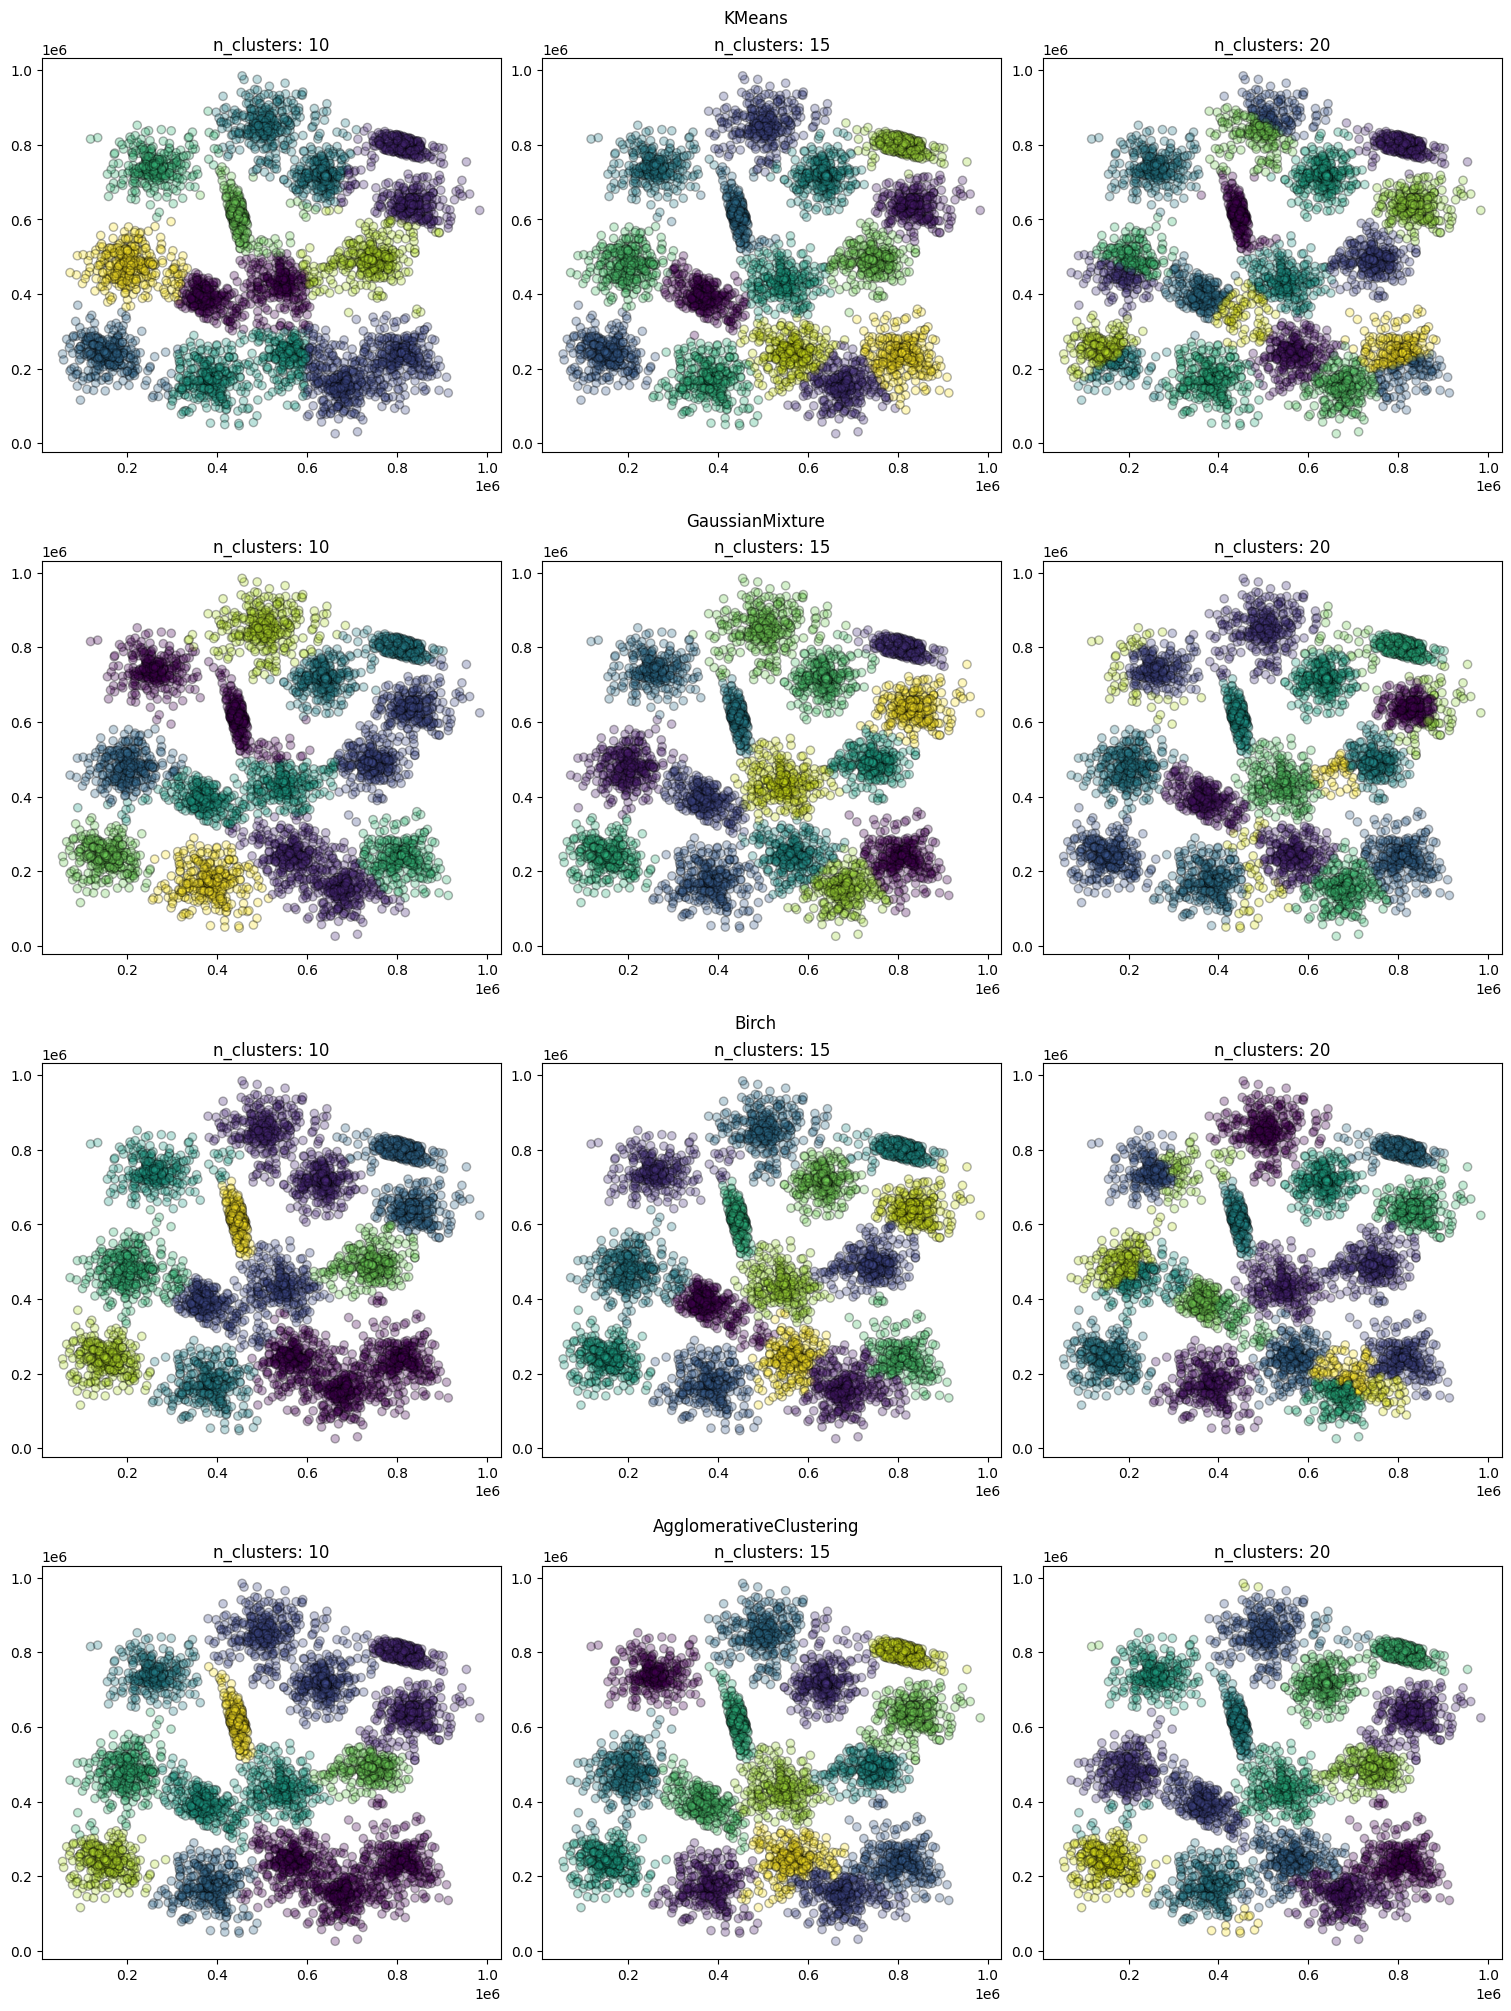

In [8]:
## BEGIN SOLUTION (do not delete this comment!)
fig = plt.figure(constrained_layout=True, figsize=(15, 20))

subfigs = fig.subfigures(nrows=4, ncols=1)
for row, subfig in enumerate(subfigs):
    algo, params = best_algos_params[row]
    subfig.suptitle(algo.__name__)
    
    axs = subfig.subplots(nrows=1, ncols=3)
    n_clusters = [10, 15, 20]
    for col, ax in enumerate(axs):
        if 'n_clusters' in params:
            params['n_clusters'] = n_clusters[col]
        else:
            params['n_components'] = n_clusters[col]
        model = algo(**params)
        predict = model.fit_predict(points)
        ax.scatter(points[:,0], points[:,1], c=predict, alpha=0.3, edgecolor='k')
        ax.set_title(f'n_clusters: {n_clusters[col]}')
### END SOLUTION (do not delete this comment!)

2) For each number of clusters vizualize the clustering result, calculate the clustering metrics and plot them;


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:59<00:00, 14.80s/it]


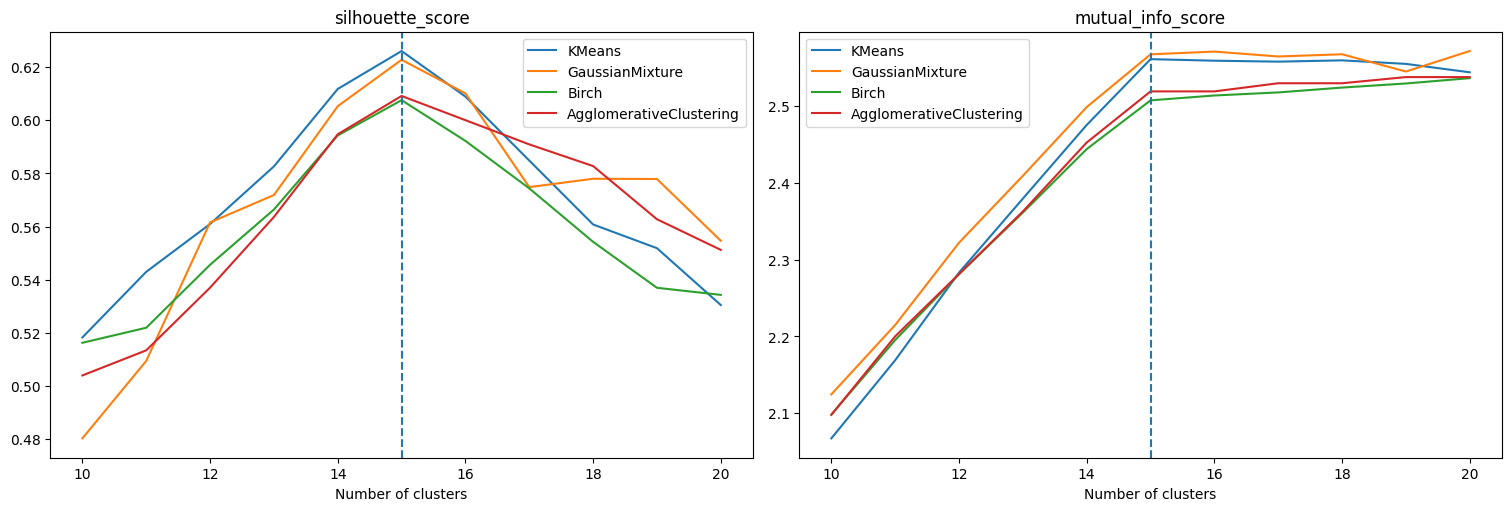

In [9]:
### BEGIN SOLUTION (do not delete this comment!)
silhouette_scores = []
mutual_scores = []
clusters = range(10, 21)
for algo, params in tqdm(best_algos_params):
    sil_score =[]
    mutual_score = []
    for n_clusters in clusters:
        if 'n_clusters' in params:
            params['n_clusters'] = n_clusters
        else:
            params['n_components'] = n_clusters
        model = algo(**params)
        predict = model.fit_predict(points)
        
        mutual = mutual_info_score(labels, predict)
        silhouette = silhouette_score(points, predict)
        mutual_score.append(mutual)
        sil_score.append(silhouette)
    silhouette_scores.append(sil_score)
    mutual_scores.append(mutual_score)

fig, axes = plt.subplots(nrows=1, ncols=2, layout='constrained', figsize=(15, 5))
for i, scores in enumerate(silhouette_scores):
    axes[0].plot(clusters, scores, label=best_algos_params[i][0].__name__)
axes[0].set_xlabel('Number of clusters')
axes[0].set_title('silhouette_score')
axes[0].axvline(x=number_of_clasters, ls='--')
axes[0].legend()

for i, scores in enumerate(mutual_scores):
    axes[1].plot(clusters, scores, label=best_algos_params[i][0].__name__)
axes[1].set_xlabel('Number of clusters')
axes[1].set_title('mutual_info_score')
axes[1].axvline(x=number_of_clasters, ls='--')
axes[1].legend()

plt.show()
### END SOLUTION (do not delete this comment!)

### Task 3.2. Finding the Number of Clusters with Bootstrap. (1 pt.)
For a chosen algorithm find the best number of clusters using bootstrap. Based on your observations made at the previous task, choose one algorithm assuming **you do not have true labels and do not know the true number of clusters**.
1. Estimate variance of the clustering metric of your choice (i.e. *silhouette score*/*mutual information*/*adjusted mutual information*)and construct normal 95% **confidence interval (CI)**;
2. **Plot the metric** with the corresponding confidence intervals and show the best number of clusters.

__Hints:__ 
- you can choose bootstrap samples with any size, and sample number starting from `50`;
- you can use `scipy.stats.norm.interval()` to derive CI;

1) Estimate variance of the clustering metric of your choice (i.e. silhouette score/mutual information/adjusted mutual information)and construct normal 95% confidence interval (CI);

In [11]:
### BEGIN SOLUTION (do not delete this comment!)
best_algo, best_params = best_algos_params[0]
clusters = range(10, 21)

cluster_scores = []
for n_clusters in clusters:
    best_params['n_clusters'] = n_clusters
    scores = []
    for trial in range(50):
        btstrp = np.random.randint(0, 5000, size=1666)
        train = points[btstrp]
        model = best_algo(**best_params)
        predict = model.fit_predict(train)
        scores.append(silhouette_score(train, predict))
    cluster_scores.append(scores)
### END SOLUTION (do not delete this comment!)

2) Plot the metric with the corresponding confidence intervals and show the best number of clusters.

Number of clusters: 10
	 Variance: 7.808102231748557e-05
	 Confidence interval: (0.505452542661248, 0.5400903850831031)
Number of clusters: 11
	 Variance: 7.554335506760206e-05
	 Confidence interval: (0.5226595300485546, 0.5567298507203222)
Number of clusters: 12
	 Variance: 5.2030967350677685e-05
	 Confidence interval: (0.5498951724279559, 0.5781705906196297)
Number of clusters: 13
	 Variance: 6.684174982492254e-05
	 Confidence interval: (0.5710352413310045, 0.6030833195545473)
Number of clusters: 14
	 Variance: 4.911317493070704e-05
	 Confidence interval: (0.5986554054798432, 0.6261265713851962)
Number of clusters: 15
	 Variance: 4.486710352766064e-05
	 Confidence interval: (0.6143257741654752, 0.6405825927545828)
Number of clusters: 16
	 Variance: 6.509468418004955e-05
	 Confidence interval: (0.5973319139341238, 0.628958393265453)
Number of clusters: 17
	 Variance: 8.6388278736226e-05
	 Confidence interval: (0.5773394469499162, 0.613773333119572)
Number of clusters: 18
	 Variance: 0

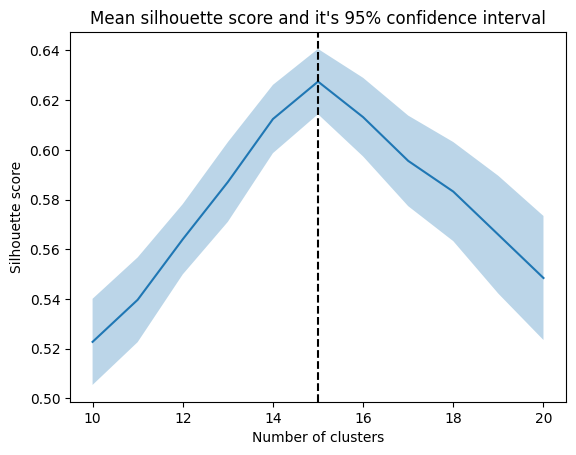

In [12]:
### BEGIN SOLUTION (do not delete this comment!)
means = np.mean(cluster_scores, axis=1)
stds = np.std(cluster_scores, axis=1)
vars_ = np.var(cluster_scores, axis=1)

lowers = []
uppers = []

for i, n_clusters in enumerate(clusters):
    print(f'Number of clusters: {n_clusters}')
    print(f'\t Variance: {vars_[i]}')
    low, up = stats.norm.interval(0.95, loc=means[i], scale=stds[i])
    lowers.append(low)
    uppers.append(up)
    print(f'\t Confidence interval: {(low, up)}')

plt.plot(clusters, means)
plt.fill_between(clusters, lowers, uppers, alpha=0.3)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Mean silhouette score and it\'s 95% confidence interval')
plt.axvline(x=number_of_clasters, color='black', ls='--')
plt.show()
### END SOLUTION (do not delete this comment!)

## Task 4. Practice with Different Anomaly Detection Algorithms. (2 pts)

### Task 4.1 (1 pt)

- Here we will use __fraud_dataset__ (creditcard.csv )
- Compute the __contamination__ (or impurity) on the **test** set as the ratio of anomaly objects to all the objects.  
- Predict the anomaly with any **three** Anomaly detection methods among ones from: https://scikit-learn.org/stable/modules/outlier_detection.html, note, we do not use true labels to fit anomaly detectors.
- Explore, how the `roc_auc_score` for anomaly detectors changes with `contamination` value, taking a grid `[0.1*contamination, 1*contamination, 10*contamination]`. Point out the best performing algorithm.

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score

data = pd.read_csv('creditcard.csv')

X = data.drop(columns="Class")
y = data["Class"]

# keep the split fixed
tt_split = train_test_split(X, y, test_size = 0.1, stratify=y, random_state= 42)
train_X, test_X, train_y, test_y = tt_split 

# delete the targets for training
train_y = 0

In [3]:
### BEGIN SOLUTION (do not delete this comment!)
contamination = test_y.mean()
### END SOLUTION (do not delete this comment!)

In [4]:
### BEGIN SOLUTION (do not delete this comment!)
for i in [0.1, 1, 10]:
    # >>> your solution here <<<
    isoforest = IsolationForest(n_jobs=-1, random_state=42, 
                                contamination=i * contamination).fit(train_X)
    local = LocalOutlierFactor(n_jobs=-1, contamination=i * contamination, novelty=True).fit(train_X)
    oneclass = OneClassSVM(nu=i * contamination).fit(train_X)
    
    for model in [isoforest, oneclass, local]:
        predict = model.predict(test_X)
        predict -= 1
        predict[predict == -2] = 1

        print(model.__class__.__name__ + ' : Contamination: {:.3f}   '.format(i * contamination), 
              'ROC/AUC: {:.3f}   '.format(roc_auc_score(test_y, predict)),
              'Precision: {:.3f}   '.format(precision_score(test_y, predict, average='micro')))
### END SOLUTION (do not delete this comment!)

IsolationForest : Contamination: 0.002    ROC/AUC: 0.541    Precision: 0.984   
OneClassSVM : Contamination: 0.002    ROC/AUC: 0.499    Precision: 0.980   
LocalOutlierFactor : Contamination: 0.002    ROC/AUC: 0.499    Precision: 0.981   
IsolationForest : Contamination: 0.017    ROC/AUC: 0.772    Precision: 0.986   
OneClassSVM : Contamination: 0.017    ROC/AUC: 0.489    Precision: 0.961   
LocalOutlierFactor : Contamination: 0.017    ROC/AUC: 0.500    Precision: 0.963   
IsolationForest : Contamination: 0.169    ROC/AUC: 0.872    Precision: 0.848   
OneClassSVM : Contamination: 0.169    ROC/AUC: 0.510    Precision: 0.826   
LocalOutlierFactor : Contamination: 0.169    ROC/AUC: 0.506    Precision: 0.817   


### Task 4.2 (1 pt)

The idea is to see when anomaly detection methods, trained with no labels, can facilitate the prediction of the classifier. Imagine a real case scenario: you have labelled only a small portion of the dataset and a bunch of unlabeled data. We will simulate the situation when __90%__ of data is unlabeled and we still desire to achieve good performance. 


As you can score your predictions only on the __10%__ of the sample, you better do it in cross validation to ensure the model stability.
1. Take your favorite classifier and estimate the performance on __test set__ using `StratifiedKFold(n_splits=10, random_state = 42)` with `roc_auc` and `precision_score`. You can use test set upsampling and other instruments to enforce your prediction. 

> Do not get confused, here we swap __train__ and __test__ and use __test__ as if it's the only data we have on our hands.

2. Try to enhance the classifier performance in  `roc_auc` or `precision_score` (or ideally both), building the ensemble, using __Anomaly detection__ methods from the previous task. You can fit __Anomaly detection__ methods on both  __training set__ and subset from __test set__ on the cross-validation fold.

__NOTE:__ try not to overfit, thus not adjust the `contamination` while training, and refit classifiers on each fold. 

__Hints:__ `sklearn.ensemble.VotingClassifier` does not support Anomaly detection methods, so you are to write it yourself. And `np.logical_and` or `np.logical_or` will suit for the trivial ensemble.

In [5]:
### BEGIN SOLUTION (do not delete this comment!)

# choose your favorite classifier, e.g. from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, random_state = 42, shuffle=True)
skf.get_n_splits(test_X, test_y)

roc_auc_scores = [] 
pr_scores = []

for train_index, test_index in skf.split(test_X, test_y):
    clf = LogisticRegression(random_state=42, 
                             solver='newton-cg').fit(test_X.iloc[train_index], test_y.iloc[train_index])
    predict = clf.predict(test_X.iloc[test_index])
    roc_auc_scores.append(roc_auc_score(test_y.iloc[test_index], predict))
    pr_scores.append(precision_score(test_y.iloc[test_index], predict, average='micro'))

print('ROC/AUC mean:  {} std:  {}'.format(np.mean(roc_auc_scores), np.std(roc_auc_scores)))
print('Precision mean:  {} std:  {}'.format(np.mean(pr_scores), np.std(pr_scores)))
### END SOLUTION (do not delete this comment!)

ROC/AUC mean:  0.9062694588584137 std:  0.05532796690329066
Precision mean:  0.994469633695263 std:  0.0035228995645114176


Try to enhance the classifier performance using Anomaly detection methods

In [7]:
### BEGIN SOLUTION (do not delete this comment!)

skf = StratifiedKFold(n_splits=10, random_state = 42, shuffle=True)
skf.get_n_splits(test_X, test_y)

roc_auc_scores = [] 
pr_scores = []

for train_index, test_index in skf.split(test_X, test_y):
    isoforest = IsolationForest(n_jobs=-1, random_state=42).fit(test_X.iloc[train_index])
    clf = LogisticRegression(random_state=42, 
                             solver='newton-cg').fit(test_X.iloc[train_index], test_y.iloc[train_index])
    
    predict1 = isoforest.predict(test_X.iloc[test_index])
    predict1 -= 1
    predict1[predict1 == -2] = 1
    predict2 = clf.predict(test_X.iloc[test_index])
    
    predict = np.logical_or(predict1, predict2)
    
    roc_auc_scores.append(roc_auc_score(test_y.iloc[test_index], predict))
    pr_scores.append(precision_score(test_y.iloc[test_index], predict, average='micro'))

print('ROC/AUC mean:  {} std:  {}'.format(np.mean(roc_auc_scores), np.std(roc_auc_scores)))
print('Precision mean:  {} std:  {}'.format(np.mean(pr_scores), np.std(pr_scores)))
### END SOLUTION (do not delete this comment!)

ROC/AUC mean:  0.9139634297010133 std:  0.06676752884269373
Precision mean:  0.9709664717814104 std:  0.008208537932206795


Write 1-2 sentences on your findings.

*BEGIN SOLUTION (do not delete this comment!)*

Using classifier only already gave 0.994 precision, which is a pretty high score, so it difficult to beat this baseline. But I could outperform it with IsolationForest in ROC/AUC score; other anomaly detectors hadn't helped me, even in ensamble.

*END SOLUTION (do not delete this comment!)*